In [81]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [82]:
filename = 'internet_session1.csv'
names = ['name', 'start_time', 'usage_time', 'IP', 'MAC', 'upload', 'download', 'total_transfer', 'seession_break_reason']
dataset = read_csv(filename, parse_dates=['start_time'])

print(dataset)

       name          start_time   usage_time            IP                MAC  \
0     user1 2022-10-05 02:59:00  00:00:36:28  10.55.14.222  48:E7:DA:58:22:E9   
1     user1 2022-10-05 18:53:00  00:01:49:56   10.55.2.253  48:E7:DA:58:22:E9   
2     user1 2022-10-05 21:20:00  00:01:35:00   10.55.2.253  48:E7:DA:58:22:E9   
3     user1 2022-11-05 00:37:00  00:00:26:00   10.55.2.253  48:E7:DA:58:22:E9   
4     user1 2022-11-05 02:59:00  00:00:11:52   10.55.2.253  48:E7:DA:58:22:E9   
...     ...                 ...          ...           ...                ...   
4707  user9 2022-04-11 01:11:00  00:06:54:32   10.55.4.189  DA:2F:97:0E:B7:D0   
4708  user9 2022-04-11 10:26:00  00:00:23:49    10.55.4.59  DA:2F:97:0E:B7:D0   
4709  user9 2022-04-11 20:41:00  00:01:24:13  10.55.15.186  DA:2F:97:0E:B7:D0   
4710  user9 2022-05-11 00:21:00  00:08:49:43   10.55.4.159  DA:2F:97:0E:B7:D0   
4711  user9 2022-05-11 20:55:00  00:01:06:20    10.55.2.33  DA:2F:97:0E:B7:D0   

         upload    download

In [83]:
dataset.shape

(4712, 9)

In [84]:
dataset.columns

Index(['name', 'start_time', 'usage_time', 'IP', 'MAC', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

In [85]:
dataset.columns = dataset.columns.str.lower()

In [86]:
dataset.columns

Index(['name', 'start_time', 'usage_time', 'ip', 'mac', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

In [87]:
dataset.dtypes

name                             object
start_time               datetime64[ns]
usage_time                       object
ip                               object
mac                              object
upload                           object
download                         object
total_transfer                  float64
seession_break_reason            object
dtype: object

In [88]:
dataset.isna().sum()

name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
dtype: int64

In [89]:
dataset = dataset.dropna().copy()
dataset.isna().sum()

name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    0
dtype: int64

In [90]:
dataset.duplicated().sum()

0

In [91]:
dataset['usage_time']

0       00:00:36:28
1       00:01:49:56
2       00:01:35:00
3       00:00:26:00
4       00:00:11:52
           ...     
4706    00:02:08:33
4707    00:06:54:32
4708    00:00:23:49
4709    00:01:24:13
4710    00:08:49:43
Name: usage_time, Length: 4703, dtype: object

In [92]:
from datetime import datetime
dataset['usage_time'] = dataset['usage_time'].str.replace('00:', '', 1)
dataset['usage_time'] = pd.to_datetime(dataset['usage_time'])

In [93]:
dataset['usage_time']

0      2023-01-20 00:36:28
1      2023-01-20 01:49:56
2      2023-01-20 01:35:00
3      2023-01-20 00:26:00
4      2023-01-20 00:11:52
               ...        
4706   2023-01-20 02:08:33
4707   2023-01-20 06:54:32
4708   2023-01-20 00:23:49
4709   2023-01-20 01:24:13
4710   2023-01-20 08:49:43
Name: usage_time, Length: 4703, dtype: datetime64[ns]

In [94]:
dataset.dtypes

name                             object
start_time               datetime64[ns]
usage_time               datetime64[ns]
ip                               object
mac                              object
upload                           object
download                         object
total_transfer                  float64
seession_break_reason            object
dtype: object

In [95]:
dataset['upload'] = dataset['upload'].str.extract('(\d+)', expand=False)
dataset.upload = dataset.upload.astype(float)

dataset['download'] = dataset['download'].str.extract('(\d+)', expand=False)
dataset.download = dataset.download.astype(float)

In [96]:
dataset.dtypes

name                             object
start_time               datetime64[ns]
usage_time               datetime64[ns]
ip                               object
mac                              object
upload                          float64
download                        float64
total_transfer                  float64
seession_break_reason            object
dtype: object

In [97]:
dataset

name          start_time          usage_time            ip  \
0     user1 2022-10-05 02:59:00 2023-01-20 00:36:28  10.55.14.222   
1     user1 2022-10-05 18:53:00 2023-01-20 01:49:56   10.55.2.253   
2     user1 2022-10-05 21:20:00 2023-01-20 01:35:00   10.55.2.253   
3     user1 2022-11-05 00:37:00 2023-01-20 00:26:00   10.55.2.253   
4     user1 2022-11-05 02:59:00 2023-01-20 00:11:52   10.55.2.253   
...     ...                 ...                 ...           ...   
4706  user9 2022-03-11 22:48:00 2023-01-20 02:08:33   10.55.4.189   
4707  user9 2022-04-11 01:11:00 2023-01-20 06:54:32   10.55.4.189   
4708  user9 2022-04-11 10:26:00 2023-01-20 00:23:49    10.55.4.59   
4709  user9 2022-04-11 20:41:00 2023-01-20 01:24:13  10.55.15.186   
4710  user9 2022-05-11 00:21:00 2023-01-20 08:49:43   10.55.4.159   

                    mac    upload   download  total_transfer  \
0     48:E7:DA:58:22:E9   15861.0   333168.0       349030.40   
1     48:E7:DA:58:22:E9   16957.0   212152.0       229109.76   
2     48:E7:DA:58:22:E9   14080.0   195153.0       209233.92   
3     48:E7:DA:58:22:E9    5242.0    40806.0        46049.28   
4     48:E7:DA:58:22:E9   22067.0    10772.0        32839.68   
...                 ...       ...        ...             ...   
4706  DA:2F:97:0E:B7:D0   24555.0   400517.0       425072.64   
4707  DA:2F:97:0E:B7:D0  107960.0  2390753.0      2495610.88   
4708  DA:2F:97:0E:B7:D0   11407.0   209674.0       221081.60   
4709  DA:2F:97:0E:B7:D0   18995.0   373657.0       392652.80   
4710  DA:2F:97:0E:B7:D0   46602.0   593766.0       640368.64   

     seession_break_reason  
0             Idle-Timeout  
1             Idle-Timeout  
2             Idle-Timeout  
3             Idle-Timeout  
4             Idle-Timeout  
...                    ...  
4706          Idle-Timeout  
4707          Idle-Timeout  
4708          Idle-Timeout  
4709          Idle-Timeout  
4710          Idle-Timeout  

[4703 rows x 9 columns]

In [98]:
dataset.describe(include='all', datetime_is_numeric=True)

name                     start_time                     usage_time  \
count    4703                           4703                           4703   
unique      9                            NaN                            NaN   
top     user4                            NaN                            NaN   
freq      725                            NaN                            NaN   
mean      NaN  2022-07-24 22:25:56.159897856  2023-01-20 02:10:05.038486016   
min       NaN            2022-01-06 00:30:00            2023-01-20 00:00:01   
25%       NaN            2022-05-29 22:14:00            2023-01-20 00:31:42   
50%       NaN            2022-08-14 19:33:00            2023-01-20 01:19:40   
75%       NaN            2022-09-26 13:40:00            2023-01-20 02:49:02   
max       NaN            2022-12-10 22:52:00            2023-01-20 22:00:07   
std       NaN                            NaN                            NaN   

                ip                mac        upload      download  \
count         4703               4703  4.703000e+03  4.703000e+03   
unique        1299                 33           NaN           NaN   
top     10.55.0.89  48:E7:DA:58:22:E9           NaN           NaN   
freq            80               1235           NaN           NaN   
mean           NaN                NaN  3.378702e+04  3.966645e+05   
min            NaN                NaN  2.000000e+00  9.000000e+00   
25%            NaN                NaN  6.082000e+03  5.199800e+04   
50%            NaN                NaN  1.531900e+04  1.782680e+05   
75%            NaN                NaN  3.399600e+04  4.593660e+05   
max            NaN                NaN  2.841640e+06  2.790261e+07   
std            NaN                NaN  9.493243e+04  9.657778e+05   

        total_transfer seession_break_reason  
count     4.703000e+03                  4703  
unique             NaN                     5  
top                NaN          Idle-Timeout  
freq               NaN                  4350  
mean      4.304372e+05                   NaN  
min       1.120000e+00                   NaN  
25%       6.187008e+04                   NaN  
50%       2.027930e+05                   NaN  
75%       4.993997e+05                   NaN  
max       2.855272e+07                   NaN  
std       9.960848e+05                   NaN

In [99]:
dataset.name.value_counts()

user4    725
user6    674
user1    673
user9    571
user7    526
user3    518
user2    456
user5    335
user8    225
Name: name, dtype: int64

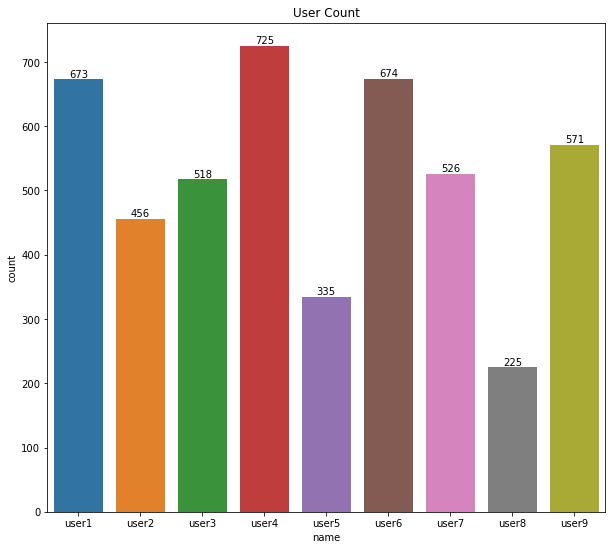

<Figure size 432x288 with 0 Axes>

In [100]:
plt.figure(figsize=(10, 9))
ax = sns.countplot(x='name', data=dataset)
ax.bar_label(ax.containers[0])
plt.title("User Count")
plt.show()
plt.clf()

In [101]:
# user4 with highest count of 725
# user8 with lowest count of 225

In [102]:
print('The earliest start time is:')
print(dataset.start_time.min())
print('The latest start time is:')
print(dataset.start_time.max())

The earliest start time is:
2022-01-06 00:30:00
The latest start time is:
2022-12-10 22:52:00


In [103]:
print('The minimum usage time is:', dataset.usage_time.min())

print('The maximum usage time is:', dataset.usage_time.max())

print('The average usage time is:', dataset.usage_time.mean())


The minimum usage time is: 2023-01-20 00:00:01
The maximum usage time is: 2023-01-20 22:00:07
The average usage time is: 2023-01-20 02:10:05.038486016


In [104]:
print('The minimum usage time per user:')
usage_time_minimum = dataset.groupby('name').usage_time.min()
usage_time_minimum

The minimum usage time per user:


name
user1   2023-01-20 00:00:18
user2   2023-01-20 00:00:08
user3   2023-01-20 00:00:01
user4   2023-01-20 00:00:45
user5   2023-01-20 00:01:07
user6   2023-01-20 00:00:18
user7   2023-01-20 00:00:20
user8   2023-01-20 00:00:20
user9   2023-01-20 00:00:09
Name: usage_time, dtype: datetime64[ns]

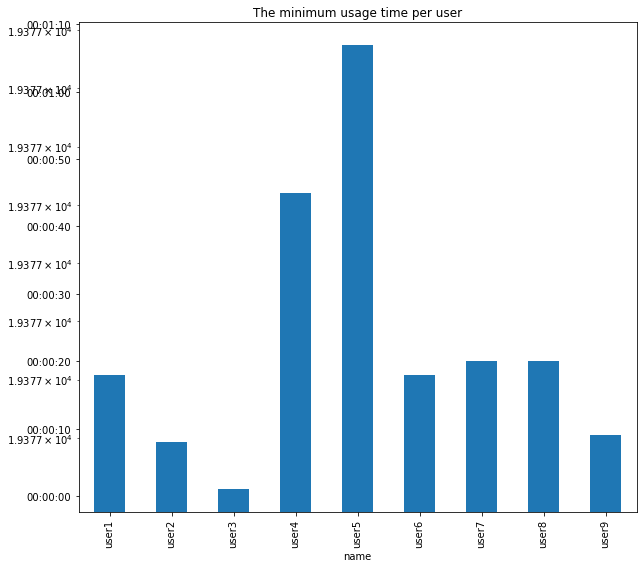

<Figure size 432x288 with 0 Axes>

In [105]:
plt.figure(figsize=(10, 9))
usage_time_minimum.plot(kind='bar', logy=True)
plt.title("The minimum usage time per user")
plt.show()
plt.clf()

In [106]:
# User 3 has the leat amount of minimum usage with 1 second, 
# while user 5 has the greatest with a minute and 7 seconds

In [107]:
print('The maximun usage time per user:')
usage_time_maximum = dataset.groupby('name').usage_time.max()
usage_time_maximum

The maximun usage time per user:


name
user1   2023-01-20 19:35:11
user2   2023-01-20 20:39:52
user3   2023-01-20 17:01:28
user4   2023-01-20 18:11:43
user5   2023-01-20 06:36:11
user6   2023-01-20 19:35:11
user7   2023-01-20 22:00:07
user8   2023-01-20 17:24:26
user9   2023-01-20 19:26:09
Name: usage_time, dtype: datetime64[ns]

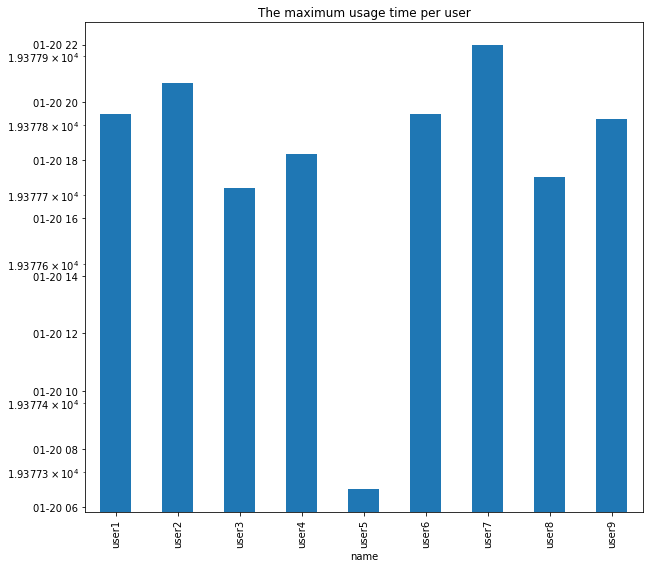

<Figure size 432x288 with 0 Axes>

In [108]:
plt.figure(figsize=(10, 9))
usage_time_maximum.plot(kind='bar', logy=True)
plt.title("The maximum usage time per user")
plt.show()
plt.clf()

In [109]:
# user 7 has the greatest maximum time usage with 22 hours and 7 seconds, 
# while user 5 has the least amount with only 6 hours 36 minutes and 11 seconds

In [110]:
print('The Average usage time per user:')
usage_time_average = dataset.groupby('name').usage_time.mean()
usage_time_average

The Average usage time per user:


name
user1   2023-01-20 01:42:47.665676032
user2   2023-01-20 01:42:53.866227968
user3   2023-01-20 02:19:42.019305216
user4   2023-01-20 02:38:01.766896640
user5   2023-01-20 01:20:11.701492736
user6   2023-01-20 01:42:49.998516224
user7   2023-01-20 02:17:45.053231872
user8   2023-01-20 04:03:14.555555584
user9   2023-01-20 02:29:32.180385280
Name: usage_time, dtype: datetime64[ns]

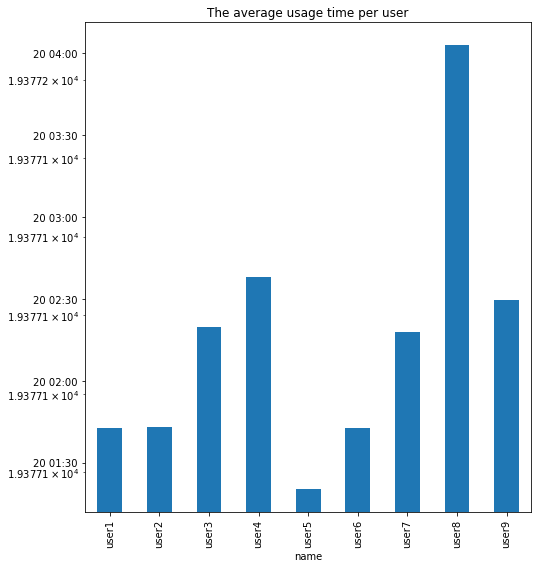

<Figure size 432x288 with 0 Axes>

In [111]:
plt.figure(figsize=(8, 9))
usage_time_average.plot(kind='bar', logy=True)
plt.title("The average usage time per user")
plt.show()
plt.clf()

In [112]:
# can see that on average, User 8 has the most usage with 4 hours 3 minutes and 14 seconds, 
# while User 5 has the least amount of average time usage with one hour 20 minutes and 11 seconds

In [113]:
dataset.ip.value_counts()

10.55.0.89      80
10.55.14.148    64
10.55.15.221    55
10.55.1.50      48
10.55.10.46     44
                ..
10.55.15.44      1
10.55.15.237     1
10.55.14.166     1
10.55.3.200      1
10.55.4.159      1
Name: ip, Length: 1299, dtype: int64

In [114]:
print('The minimum upload per user:')
dataset.groupby('name').upload.min()

The minimum upload per user:


name
user1     19.0
user2     23.0
user3     36.0
user4     56.0
user5    382.0
user6     19.0
user7      2.0
user8      4.0
user9     41.0
Name: upload, dtype: float64

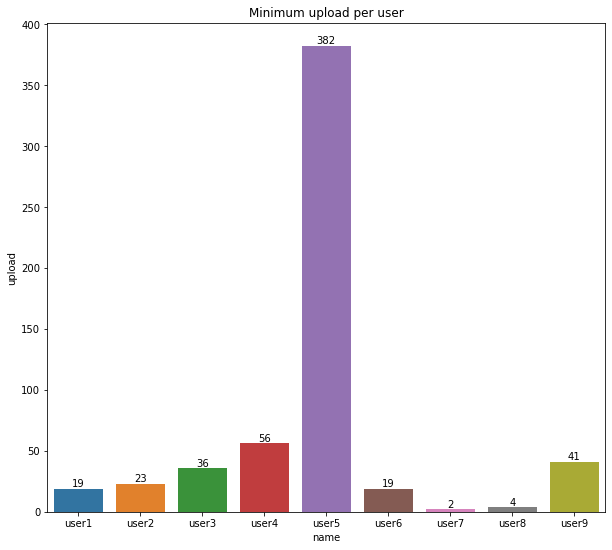

<Figure size 432x288 with 0 Axes>

In [115]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='upload' , data=dataset, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum upload per user")
plt.show()
plt.clf()

In [116]:
#user 2 has the lowest minimum upload with 2Kb 
#while user5 has the highest minimum upload with 382Kb

In [117]:
print('The maximum upload per user:')
dataset.groupby('name').upload.max()

The maximum upload per user:


name
user1     638566.0
user2     379955.0
user3    1625292.0
user4     754462.0
user5    2841640.0
user6     638566.0
user7     653731.0
user8     709058.0
user9    1352663.0
Name: upload, dtype: float64

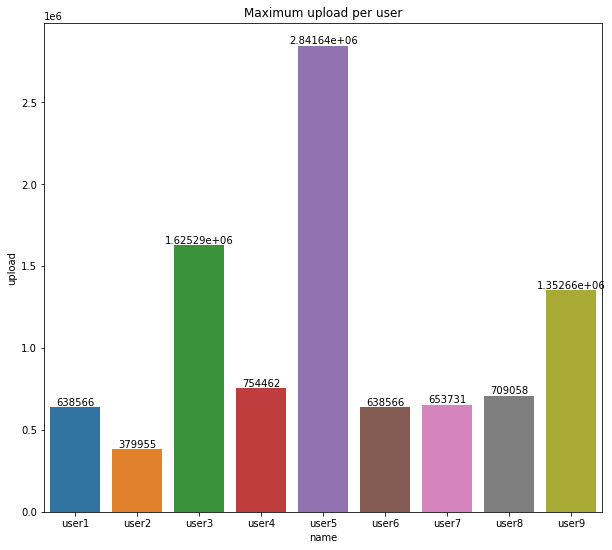

<Figure size 432x288 with 0 Axes>

In [118]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='upload' , data=dataset, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum upload per user")
plt.show()
plt.clf()

In [119]:
# User 5 has the highest maximum upload with 2841640Kb 
# with user 2 having the lowest of maximum upload with 379955Kb

In [120]:
print('The average upload per user:')
round(dataset.groupby('name').upload.mean(), 2)

The average upload per user:


name
user1    27291.34
user2    29188.79
user3    29594.88
user4    33783.74
user5    64500.35
user6    27700.73
user7    23075.54
user8    59190.12
user9    37944.66
Name: upload, dtype: float64

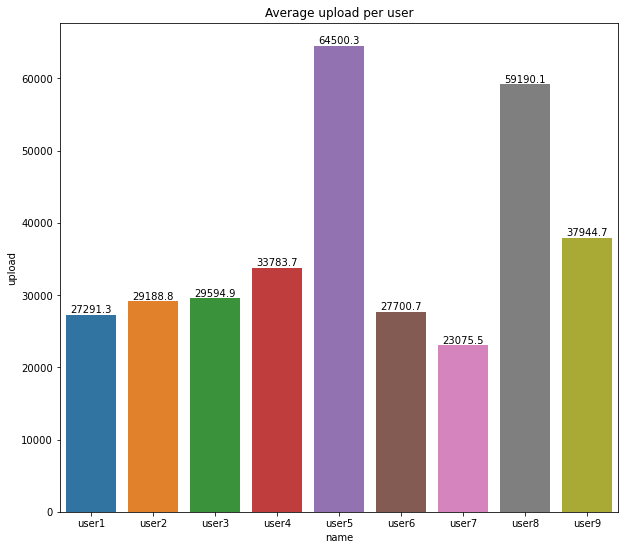

<Figure size 432x288 with 0 Axes>

In [121]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='upload' , data=dataset, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average upload per user")
plt.show()
plt.clf()

In [122]:
# User5 has the highest average upload with 64500.35Kb 
#while User 7 has the lower average with 23075.54Kb

In [123]:
print('The minimum download is: ' + str(dataset.download.min()) + 'Kb')
print('The maximum download is: ' + str(dataset.download.max()) + 'Kb')
print('The average download is: ' + str(round(dataset.download.mean(), 2)) + 'Kb')

The minimum download is: 9.0Kb
The maximum download is: 27902607.0Kb
The average download is: 396664.52Kb


In [124]:
print('The minimum download per user:')
dataset.groupby('name').download.min()

The minimum download per user:


name
user1     50.0
user2     49.0
user3     60.0
user4     12.0
user5    461.0
user6     50.0
user7      9.0
user8     13.0
user9     61.0
Name: download, dtype: float64

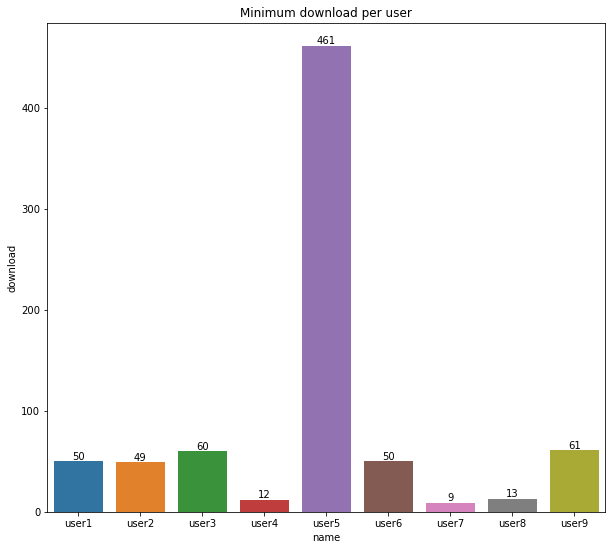

<Figure size 432x288 with 0 Axes>

In [125]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='download' , data=dataset, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum download per user")
plt.show()
plt.clf()

In [126]:
# User 5 has the highest minimum download with 461Kb
# while User 7 has the lowest with 9Kb

In [127]:
print('The maximum download per user:')
dataset.groupby('name').download.max()

The maximum download per user:


name
user1    23760732.0
user2    21831352.0
user3     3145728.0
user4     8325693.0
user5     5033164.0
user6    23760732.0
user7    27902607.0
user8     2747269.0
user9     6008340.0
Name: download, dtype: float64

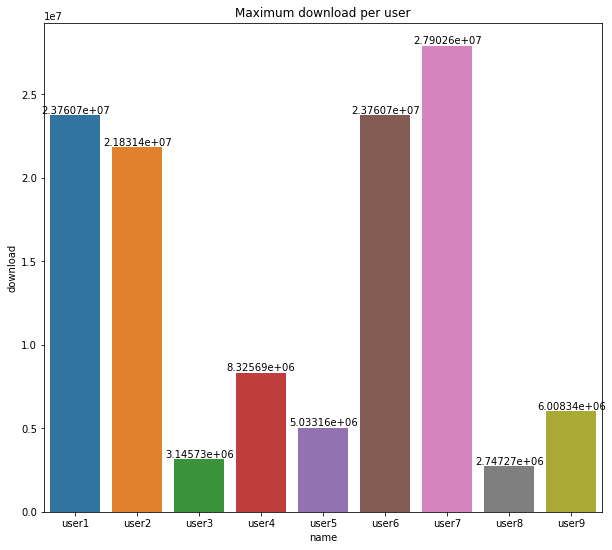

<Figure size 432x288 with 0 Axes>

In [128]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='download' , data=dataset, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum download per user")
plt.show()
plt.clf()

In [129]:
# User 7 has the highest maximum download with 27902607Kb 
# while user 8 has the lowest with 2747269Kb

In [130]:
print('The average download per user:')
round(dataset.groupby('name').download.mean(), 2)

The average download per user:


name
user1    270725.96
user2    573798.02
user3    342230.37
user4    408580.26
user5    357278.08
user6    270545.18
user7    453828.61
user8    341417.12
user9    578981.51
Name: download, dtype: float64

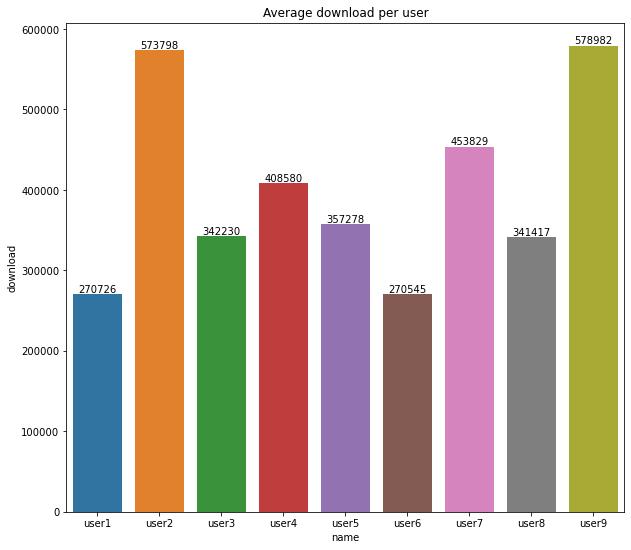

<Figure size 432x288 with 0 Axes>

In [131]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='download' , data=dataset, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average download per user")
plt.show()
plt.clf()

In [132]:
# User 9 has the highest average download with 578982.51Kb 
# while user 6 has the lowest with 270545.18Kb

In [133]:
print('The minimum total transfer is: ' + str(dataset.total_transfer.min()) + 'Kb')
print('The maximum total transfer is: ' + str(dataset.total_transfer.max()) + 'Kb')
print('The average total transfer is: ' + str(round(dataset.total_transfer.mean(), 2)) + 'Kb')

The minimum total transfer is: 1.12Kb
The maximum total transfer is: 28552724.48Kb
The average total transfer is: 430437.21Kb


In [134]:
print('The minimum total transfer per user:')
dataset.groupby('name').total_transfer.min()

The minimum total transfer per user:


name
user1     75.34
user2     73.13
user3      1.12
user4     13.45
user5    924.40
user6     75.34
user7     15.25
user8     18.08
user9    102.64
Name: total_transfer, dtype: float64

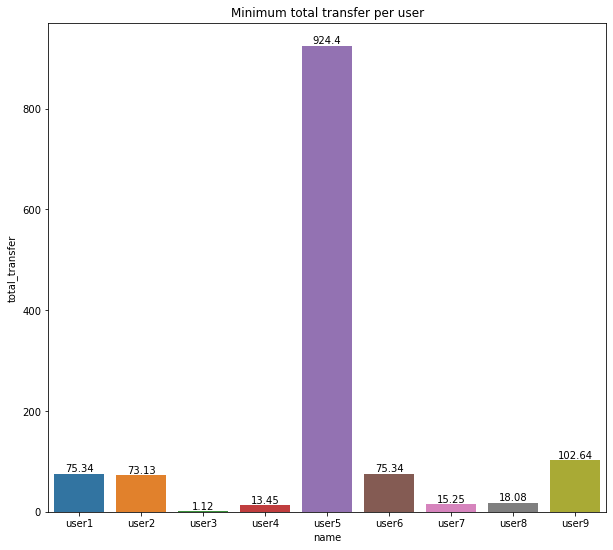

<Figure size 432x288 with 0 Axes>

In [135]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=dataset, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum total transfer per user")
plt.show()
plt.clf()

In [136]:
# User 5 has the highest minimum total transfer with 924.4Kb 
# while user 3 has the lowest with 1.12Kb

In [137]:
print('The maximum total transfer per user:')
dataset.groupby('name').total_transfer.max()

The maximum total transfer per user:


name
user1    24389877.76
user2    22051553.28
user3     3282042.88
user4     8524922.88
user5     5158993.92
user6    24389877.76
user7    28552724.48
user8     3166699.52
user9     6155141.12
Name: total_transfer, dtype: float64

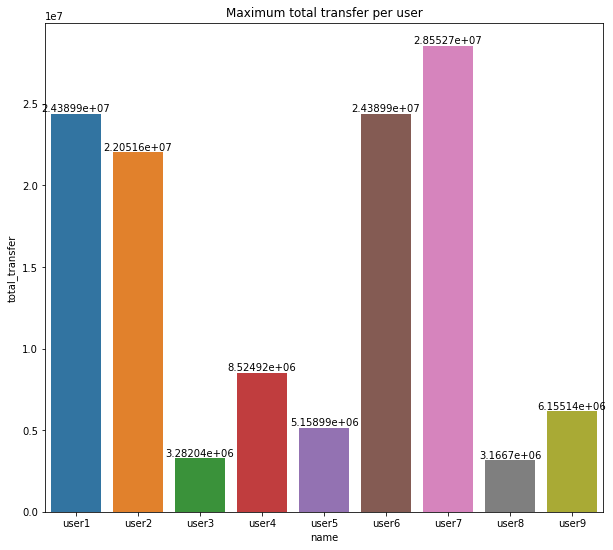

<Figure size 432x288 with 0 Axes>

In [138]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=dataset, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum total transfer per user")
plt.show()
plt.clf()

In [139]:
# User 7 has the highest maximum total transfer with 28552724.48Kb 
# while user 8 has the lowest with 3166699.52Kb

In [140]:
print('The average total transfer per user:')
round(dataset.groupby('name').total_transfer.mean(), 2)

The average total transfer per user:


name
user1    297971.21
user2    602904.19
user3    371826.53
user4    442413.51
user5    421772.04
user6    298199.88
user7    476923.04
user8    400682.28
user9    616875.57
Name: total_transfer, dtype: float64

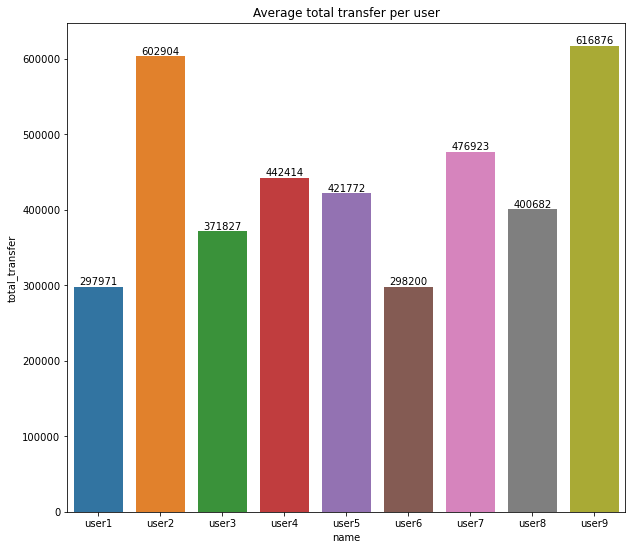

<Figure size 432x288 with 0 Axes>

In [141]:
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=dataset, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average total transfer per user")
plt.show()
plt.clf()

In [142]:
# User 9 has the highest average total transfer with 616875.57Kb 
# while user 1 has the lowest with 297971.21Kb

In [143]:
dataset.seession_break_reason.value_counts()

Idle-Timeout    4350
Lost-Carrier     162
Lost-Service     124
User-Request      65
NAS-Reboot         2
Name: seession_break_reason, dtype: int64

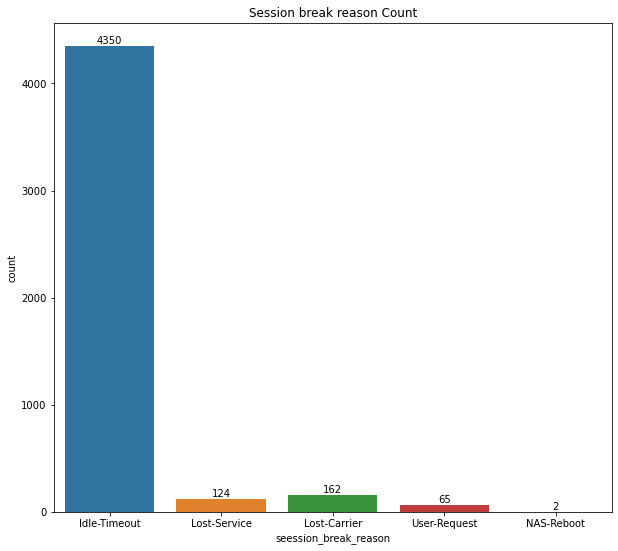

<Figure size 432x288 with 0 Axes>

In [144]:
plt.figure(figsize=(10, 9))
ax = sns.countplot(x='seession_break_reason' , data=dataset)
ax.bar_label(ax.containers[0])
plt.title("Session break reason Count")
plt.show()
plt.clf()

In [145]:
# The majority of the session break reasons were from "Idle-Timeout" with 4350 times,
# while the other reasons have very low occurrences in comparison, 
# with "NAS-Reboot" having the lowest with only 2 occurrences

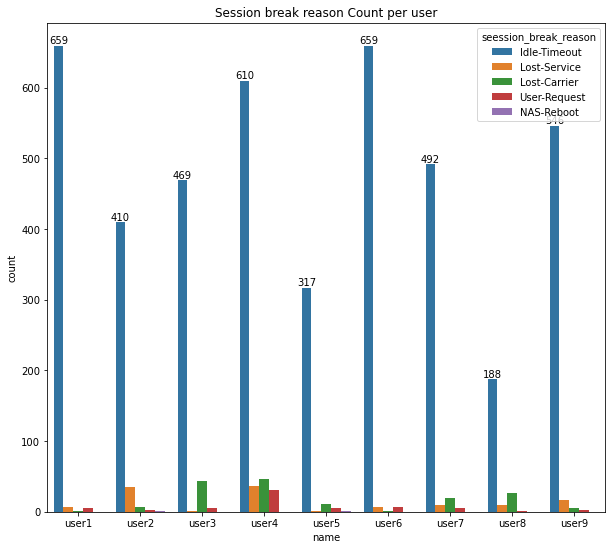

<Figure size 432x288 with 0 Axes>

In [146]:
plt.figure(figsize=(10, 9))
ax = sns.countplot(x='name', hue = 'seession_break_reason' , data=dataset)
ax.bar_label(ax.containers[0])
plt.title("Session break reason Count per user")
plt.show()
plt.clf()

In [147]:
# If we check the session break reasons count per user, it's the same thing, 
# the majority are from "Idle-Timeout" 
# while the other reasons have very low occurrences

In [148]:
# We will start with this question:

# What is the most frequent internet activity time of the day ?

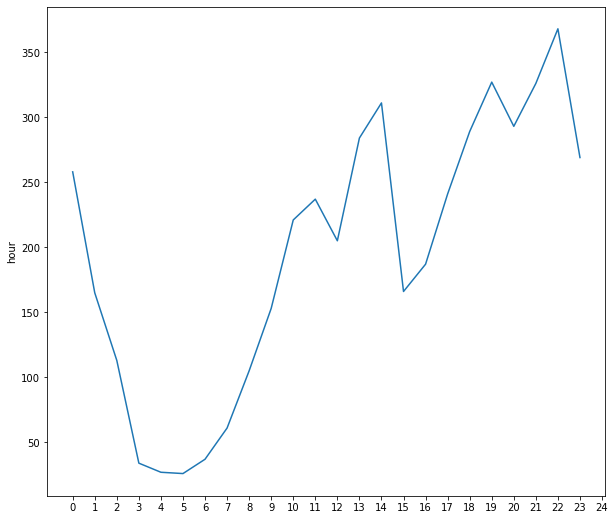

<Figure size 432x288 with 0 Axes>

In [149]:
dataset['hour'] = pd.to_datetime(dataset['start_time']).dt.hour
frequent_activity_time_of_day = dataset['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 9))
sns.lineplot(data=frequent_activity_time_of_day)
plt.xticks(np.linspace(start=0, stop=24, num=25))
plt.show()
plt.clf()

In [150]:
# The most frequent internet activity time of the day is 22h or 10pm

In [151]:
# How often the ip changes ?

In [152]:
base_ip = '48:E7:DA:58:22:E9'
ip_count = 0
for i in range(1, dataset.shape[0]):
    if dataset.iloc[i]['ip'] != base_ip:
        ip_count +=1
        base_ip = dataset.iloc[i]['ip']

print('The IP Adress changed ' + str(ip_count) + ' times') 

The IP Adress changed 2303 times


In [153]:
# we answer the final question:

# What is the average usage per hour , per day and per month ?

In [154]:
dataset.reset_index(inplace=True)

dataset['day'] = dataset['start_time'].dt.day
dataset['month'] = dataset['start_time'].dt.month

hourly_average = dataset.groupby('hour').total_transfer.mean()
print('The Average usage per hour is:\n ' +  str(round(hourly_average, 2)))

The Average usage per hour is:
 hour
0     464530.44
1     530880.86
2     431576.11
3     345303.34
4     359809.44
5     275960.91
6     468959.59
7     292886.83
8     366681.92
9     377480.64
10    393259.12
11    309492.45
12    310137.98
13    335270.58
14    472403.71
15    517005.11
16    403919.40
17    525423.69
18    666590.76
19    389841.79
20    355862.80
21    474038.34
22    449600.50
23    407785.08
Name: total_transfer, dtype: float64


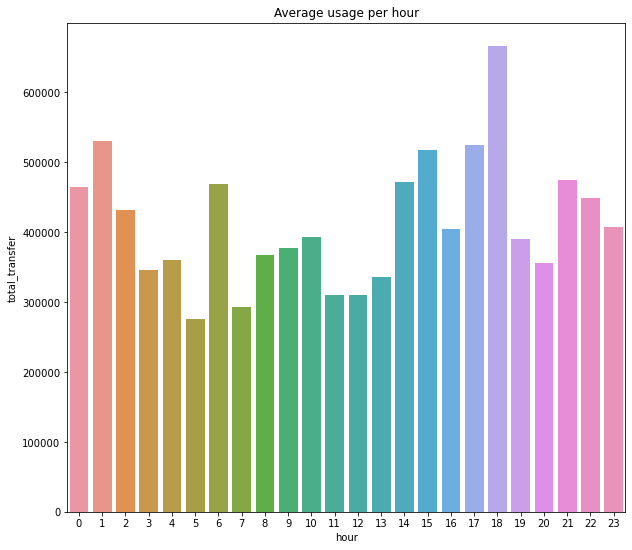

<Figure size 432x288 with 0 Axes>

In [155]:
plt.figure(figsize=(10, 9))
sns.barplot(x='hour', y='total_transfer' , data=dataset, ci=None, estimator=np.mean)
plt.title("Average usage per hour")
plt.show()
plt.clf()

In [156]:
daily_average = dataset.groupby('day').total_transfer.mean()
print('The Average usage per day is:\n ' +  str(round(daily_average, 2)))

The Average usage per day is:
 day
5     289375.90
6     323133.00
7     418583.99
8     684726.48
9     571484.14
10    503412.70
11    399804.11
13    501906.70
14    352701.10
15    521520.51
16    426719.39
17    475795.71
18    337490.93
19    301941.32
20    365130.12
21    462211.69
22    486595.37
23    383153.93
24    320598.94
25    443689.47
26    463432.02
27    324318.12
28    494576.34
29    363645.61
30    361418.88
31    369118.01
Name: total_transfer, dtype: float64


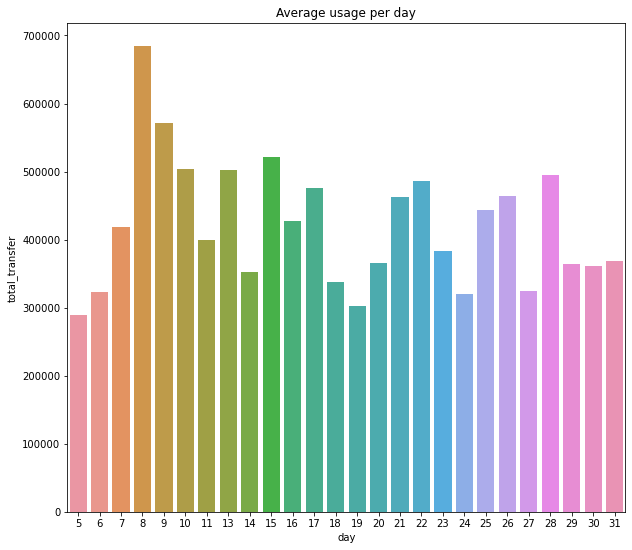

<Figure size 432x288 with 0 Axes>

In [157]:
plt.figure(figsize=(10, 9))
sns.barplot(x='day', y='total_transfer' , data=dataset, ci=None, estimator=np.mean)
plt.title("Average usage per day")
plt.show()
plt.clf()

In [158]:
monthly_average = dataset.groupby('month').total_transfer.mean()
print('The Average usage per month is:\n ' +  str(round(monthly_average, 2)))

The Average usage per month is:
 month
1     396705.04
2     494496.48
3     445865.63
4     676332.03
5     372823.49
6     355747.95
7     402259.89
8     393170.18
9     419855.95
10    521525.98
11    729857.65
12    346695.95
Name: total_transfer, dtype: float64


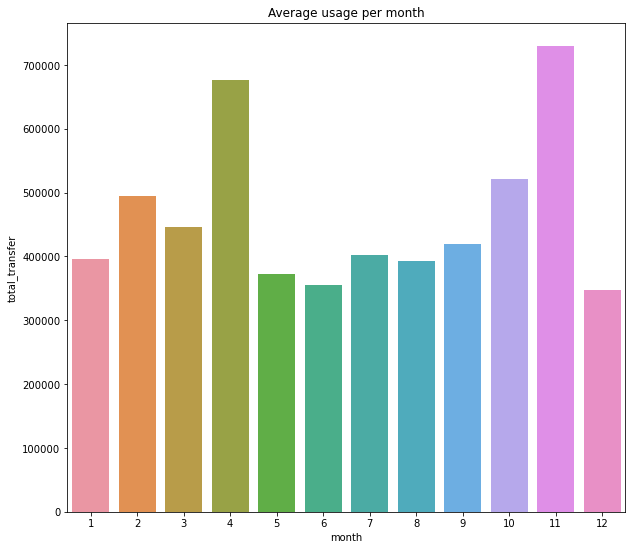

<Figure size 432x288 with 0 Axes>

In [159]:
plt.figure(figsize=(10, 9))
sns.barplot(x='month', y='total_transfer' , data=dataset, ci=None, estimator=np.mean)
plt.title("Average usage per month")
plt.show()
plt.clf()

In [160]:
#In this project we had a dataset about the internet usage [in kb] by graduate students at an indian university. 
# We imported the data, cleaned it, analyzed it and answered the questions asked

#The dataset contains 9 users that used 1224 difference devices to connect to the internet 
#while uploading 2841640.0Kb and downloading 27902607.0Kb with a total transfer of 28552724.48Kb during a period of 7 months

#The most frequent internet activity time of the day is 22h or 10pm

#The IP Adress changed 2303 times while the devices used changed 1223 times

#The highest average usage per hour was 666590.76Kb around18h or 6pm, 
# the highest average usage per day was 729857.65Kb around the 11th day of the month, 
#while the highest average usage per month was during the month of October with 549467.63Kb total transfer of data